In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("n_learn_evaluting_FaultInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.147607,0,0.085404,0
1,0,1,0.711827,0,0.044910,0
2,0,2,0.167262,0,0.045692,0
3,0,3,0.767278,0,0.044116,0
4,0,4,1.457460,0,0.061720,0


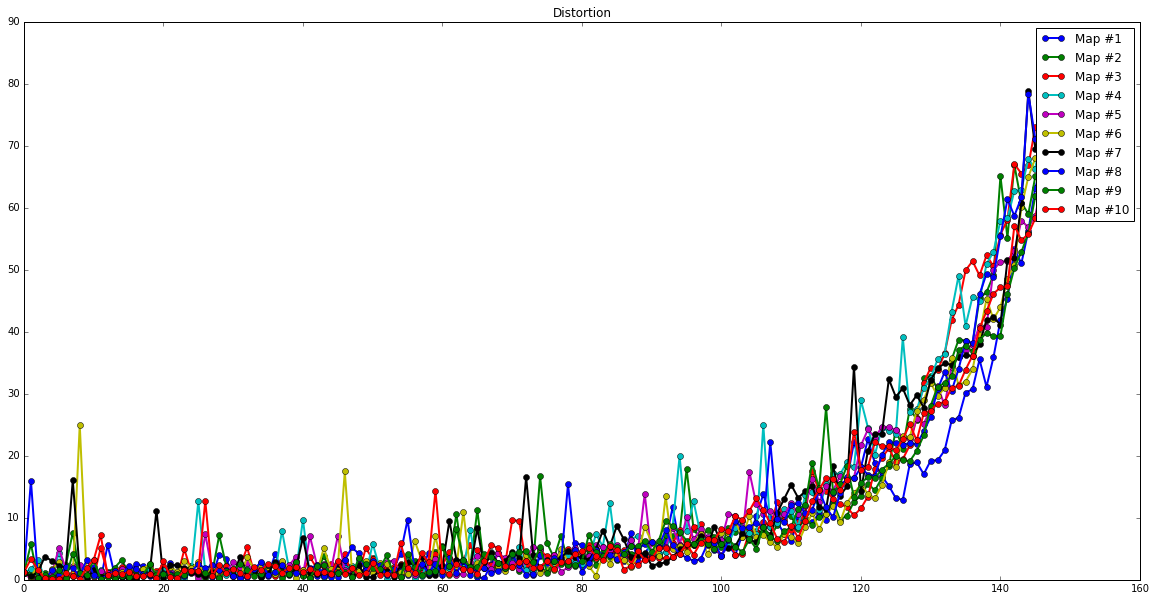

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

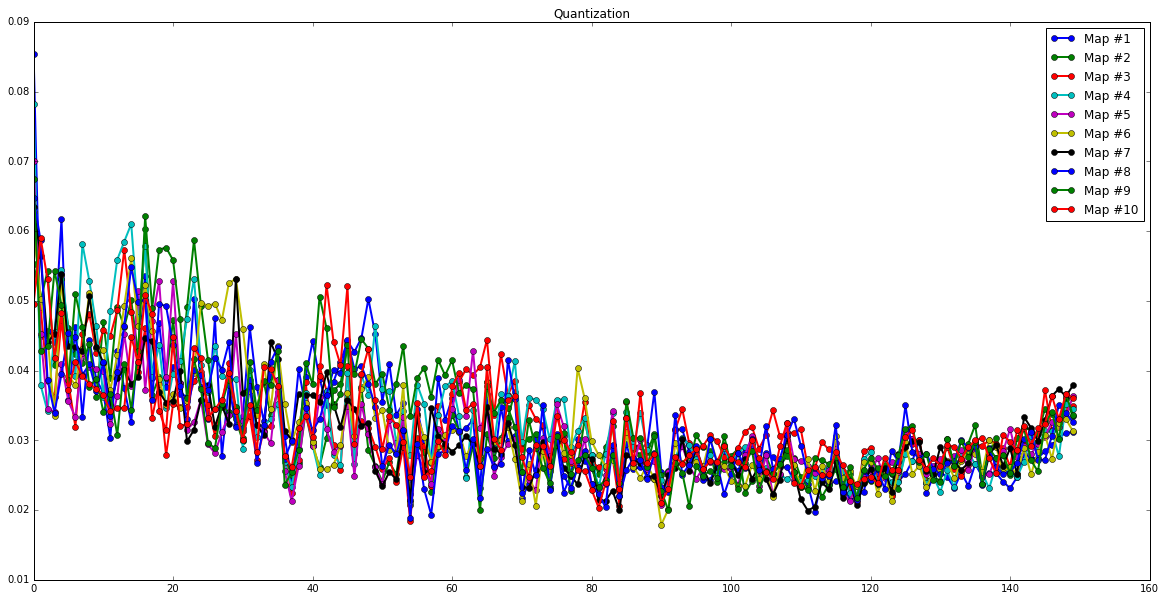

In [6]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1),
             marker='o', linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [8]:
df_v = pd.read_csv("n_valid_evaluting_FaultInj.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.114423,0,0.070553,0
1,0,1,0.915837,0,0.044089,0
2,0,2,0.293025,0,0.047148,0
3,0,3,1.262335,0,0.047617,0
4,0,4,0.892775,0,0.047405,0


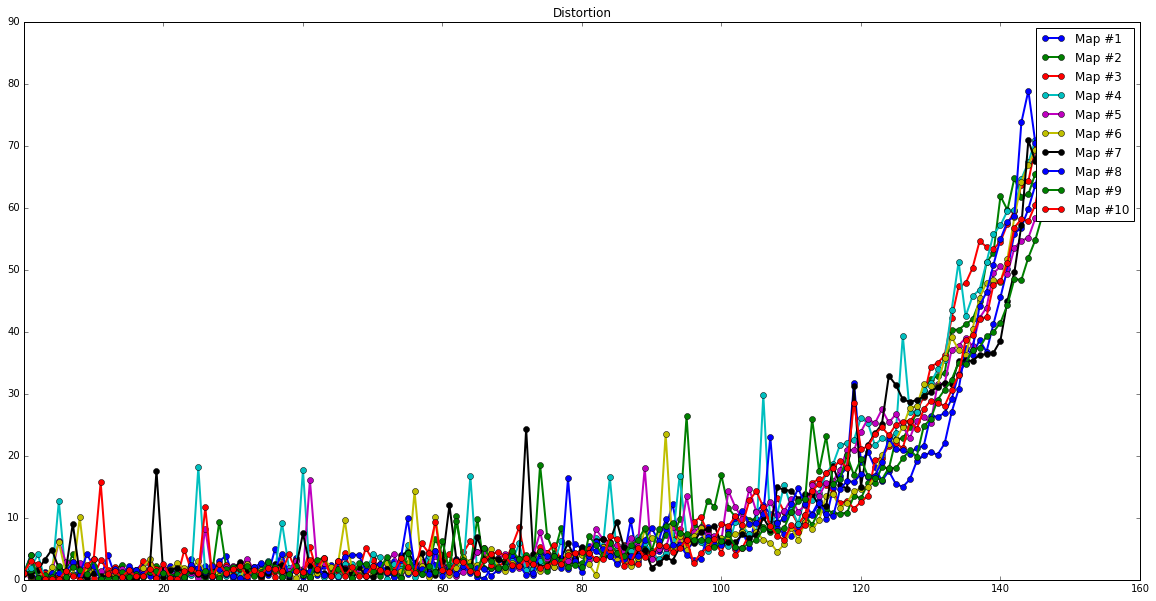

In [9]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

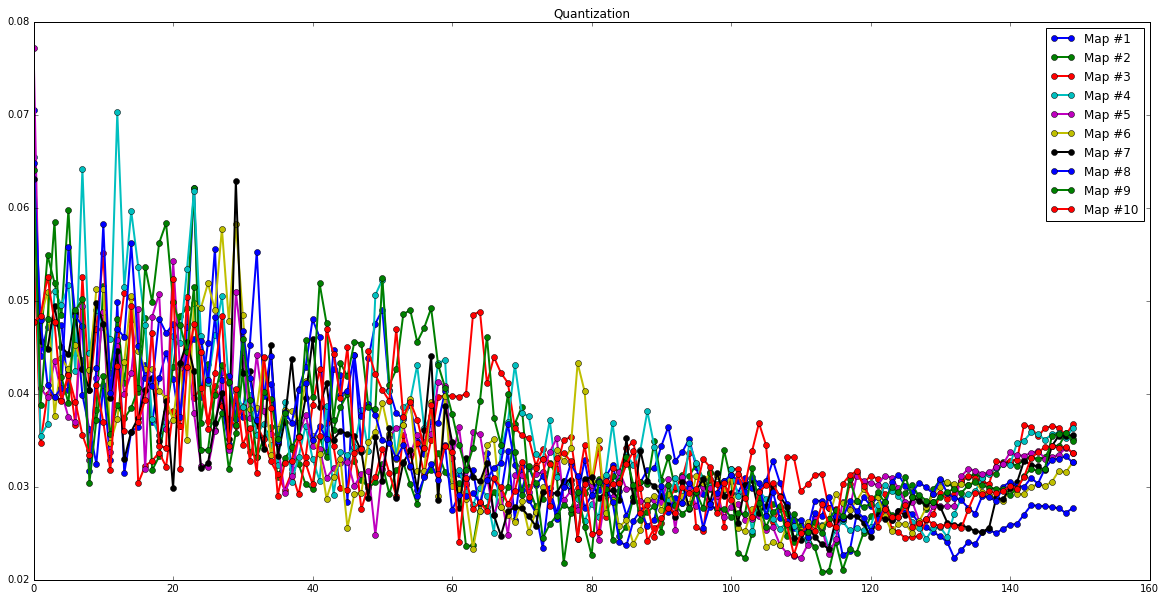

In [11]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), 
             marker='o',
            linewidth=2.0)
    plt.legend()

In [13]:
df_s = pd.read_csv("n_statistics_FaultInj.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.032318,0,0.232311,0,78.207093,0,1060.392024,0,0.002432,0,0.120641,0,5.80752,0,154.035980,0
4526,150,26,0.032318,0,0.251501,0,78.207093,0,1105.655315,0,0.002432,0,0.118575,0,5.80752,0,165.858200,0
4527,150,27,0.032318,0,0.277338,0,78.207093,0,1150.528472,0,0.002432,0,0.169989,0,5.80752,0,164.922867,0
4528,150,28,0.032318,0,0.293923,0,78.207093,0,1194.923262,0,0.002432,0,0.146627,0,5.80752,0,179.456985,0
4529,150,29,0.032318,0,0.357265,0,78.207093,0,1244.399944,0,0.002432,0,0.260429,0,5.80752,0,196.370911,0


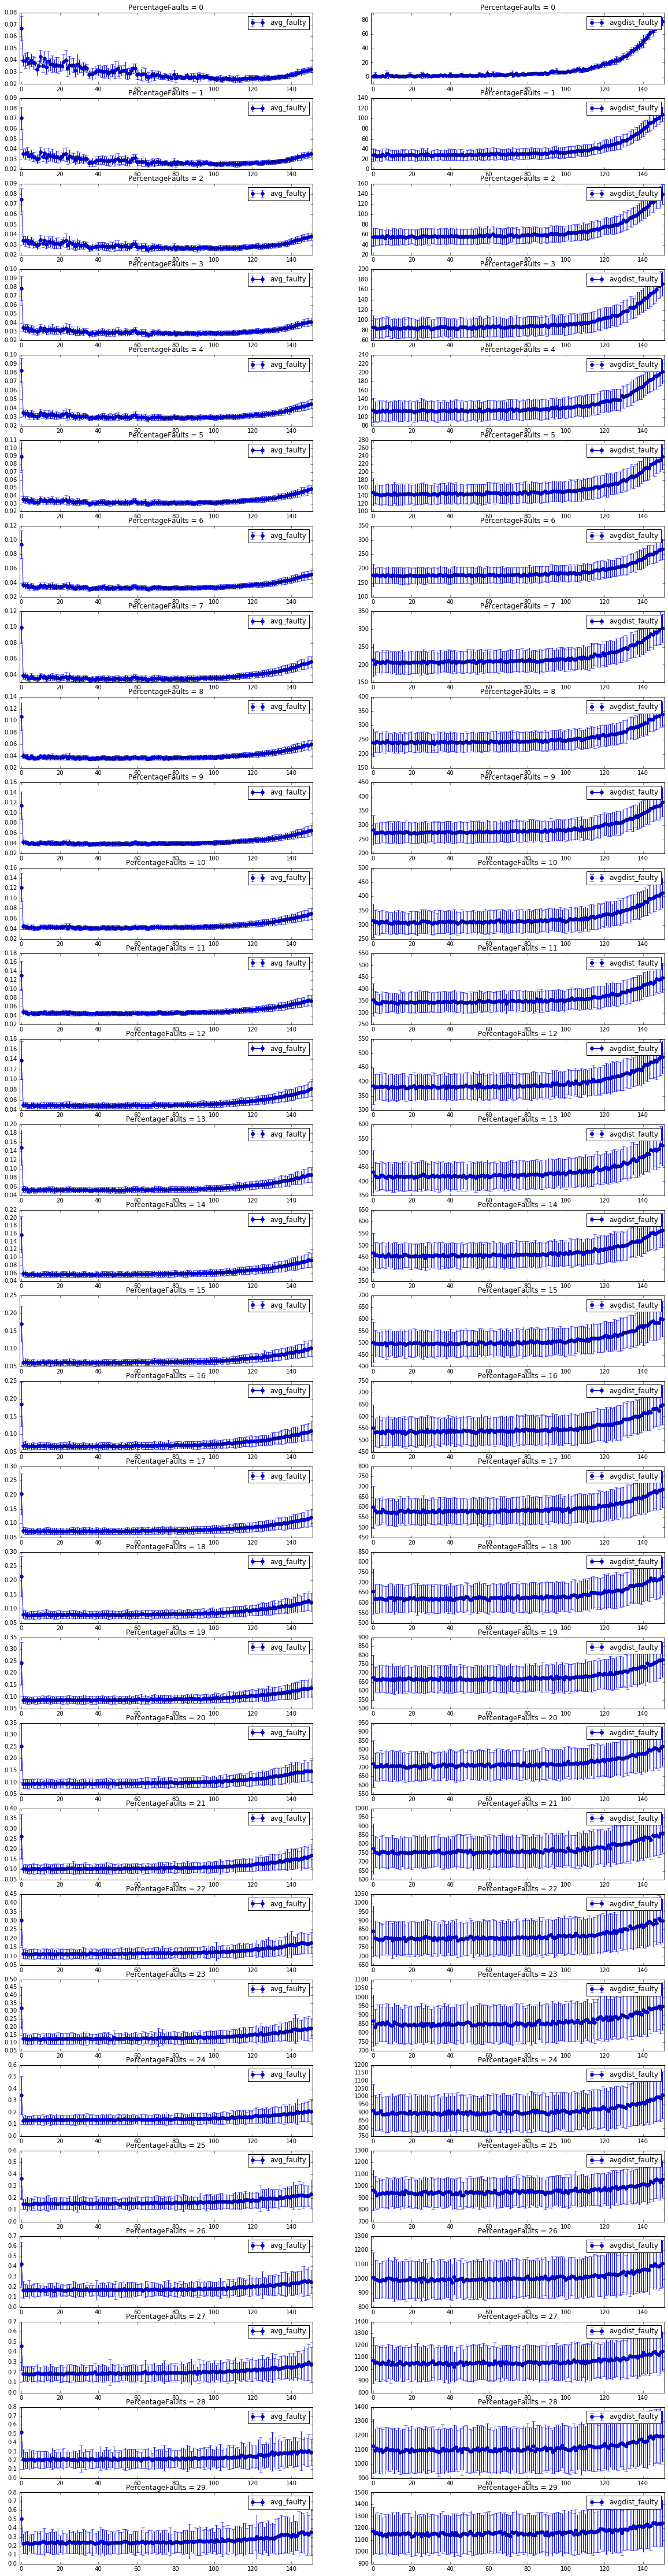

In [14]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1